# Load KBase and define the graphs

In [1]:
# import the models
from cobra.io import load_json_model
ecoli = load_json_model("ecoli.json")
pf = load_json_model("pf.json")
print(ecoli.optimize())
print(pf.optimize())

# load the media
import os
# local_cobrakbase_path = os.path.join('/Users/afreiburger/Documents')
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path
import cobrakbase
# with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())
    
# load peripheral packages
import warnings
warnings.filterwarnings(action='once')
from pandas import set_option
set_option("display.max_rows", None)
from time import process_time

# Define the standard graphs from each simulation
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        "species":["ecoli"],
        'content': 'biomass'
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_graphs(trial, conc):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

<Solution 4.599 at 0x17691ee8790>
<Solution 0.494 at 0x17691ee87f0>
cobrakbase 0.2.8


# Maltose media, trial G4 of 1:10 Ecoli:PF

In [2]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/40/1"),
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {'acetate': ["cpd00029"], #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': ["cpd00179"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            },
        pf: {
            'name': 'pf',
            'phenotypes': {'acetate': ["cpd00029"], # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': ["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)
print(f"{(process_time()-time1)/60} minutes")


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:109: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


-3.0698514492030666
-0.48914864782284867
-3.0636144602420945
The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
-1.347830069517247
The ['B2', 'B3', 'B4', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.25743282 1.25756953 1.25646515 1.25160708 1.25131364 1.24656429
 1.23908944 1.24441001 1.24179058 1.23174872 1.2387953  1.23445973
 1.2314147  1.23049743 1.23039

Done with concentrations and biomass loops: 0.0015625 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:78: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.10729166666666666 min
Done exporting the content: 0.021875 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'stationary', '4HB', 'acetate', 'malt'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G4'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'trial': 'G4'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'stationary', 'acetate', 'malt'},
 'species': ['ecoli'],
 'trial': 'G4'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G4'}


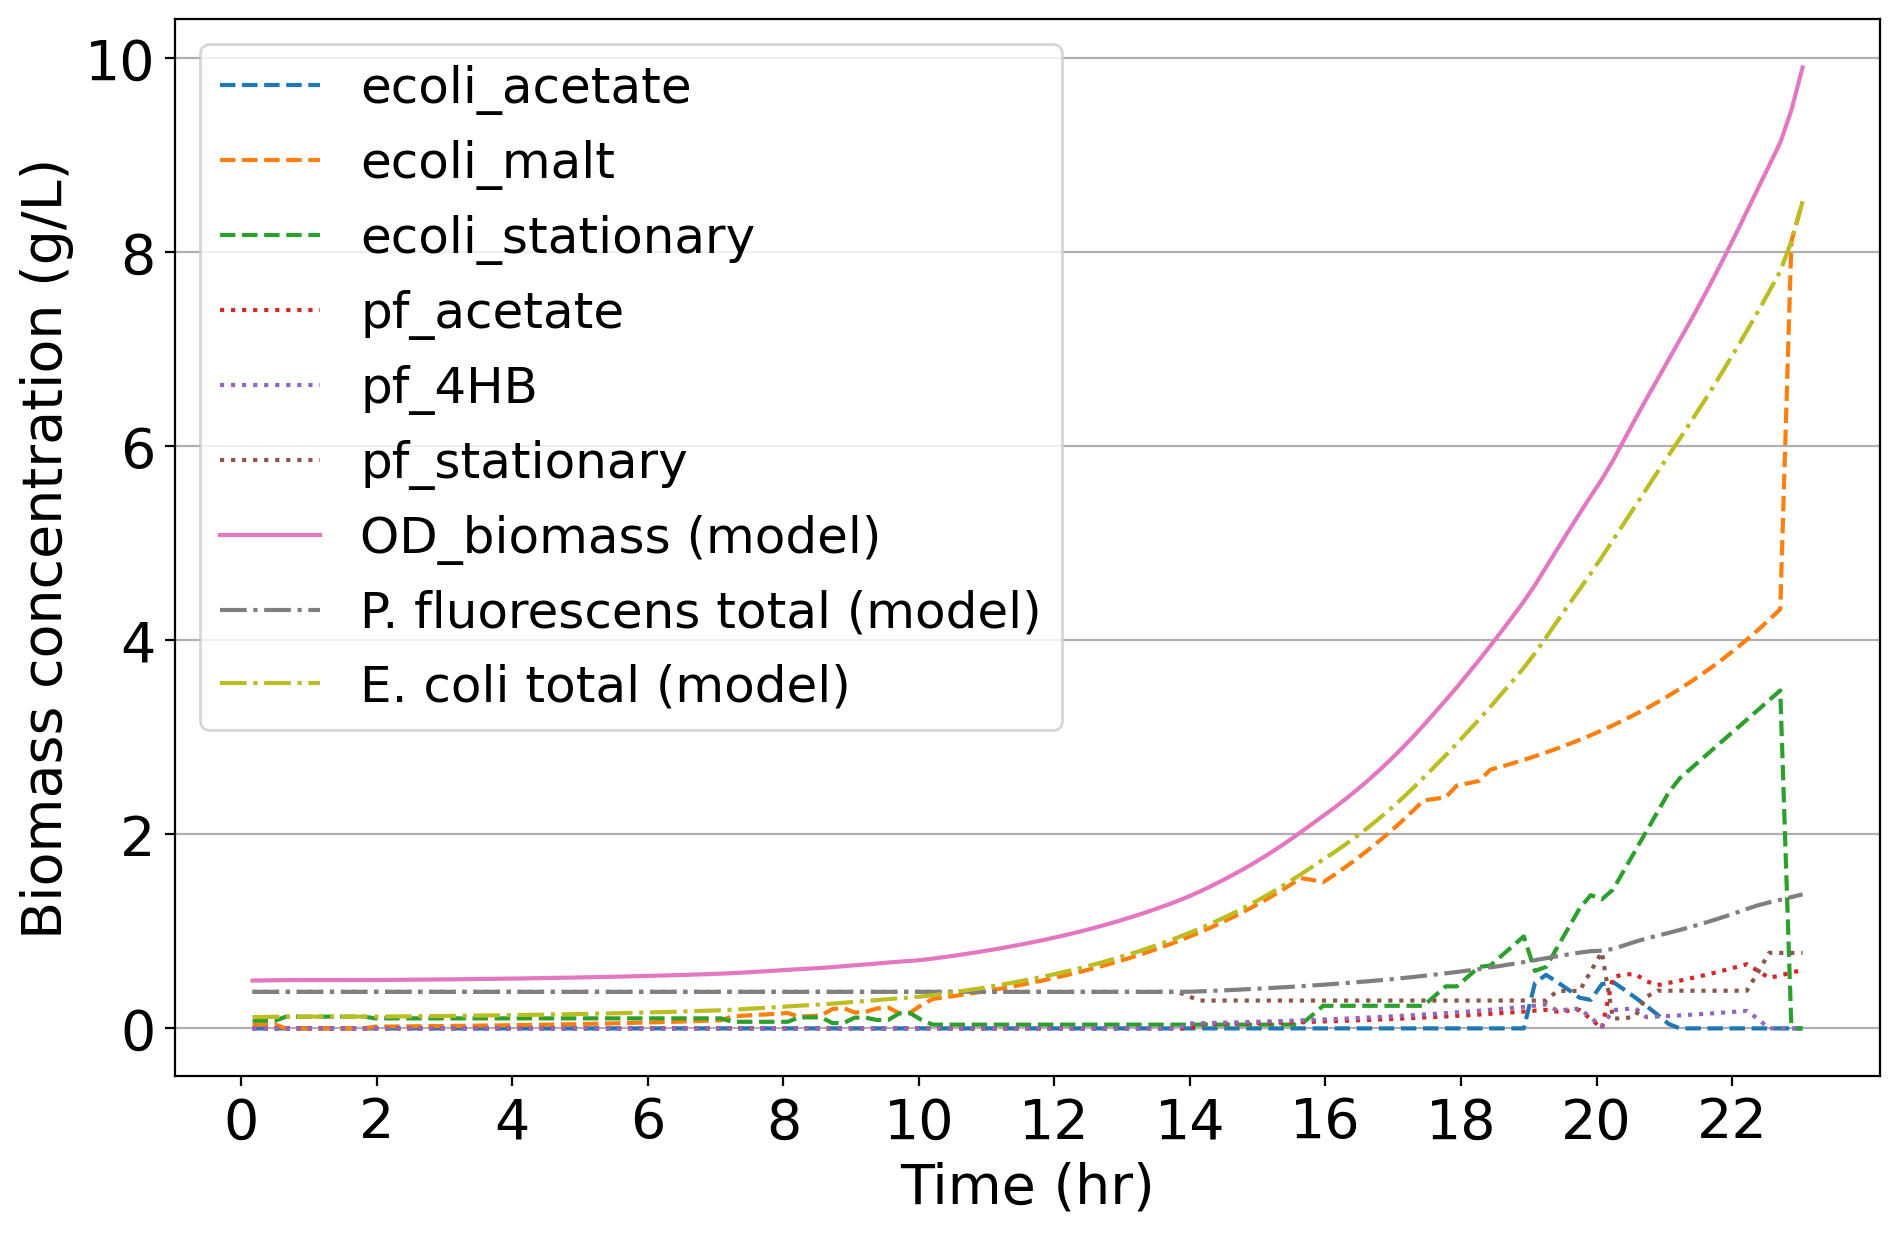

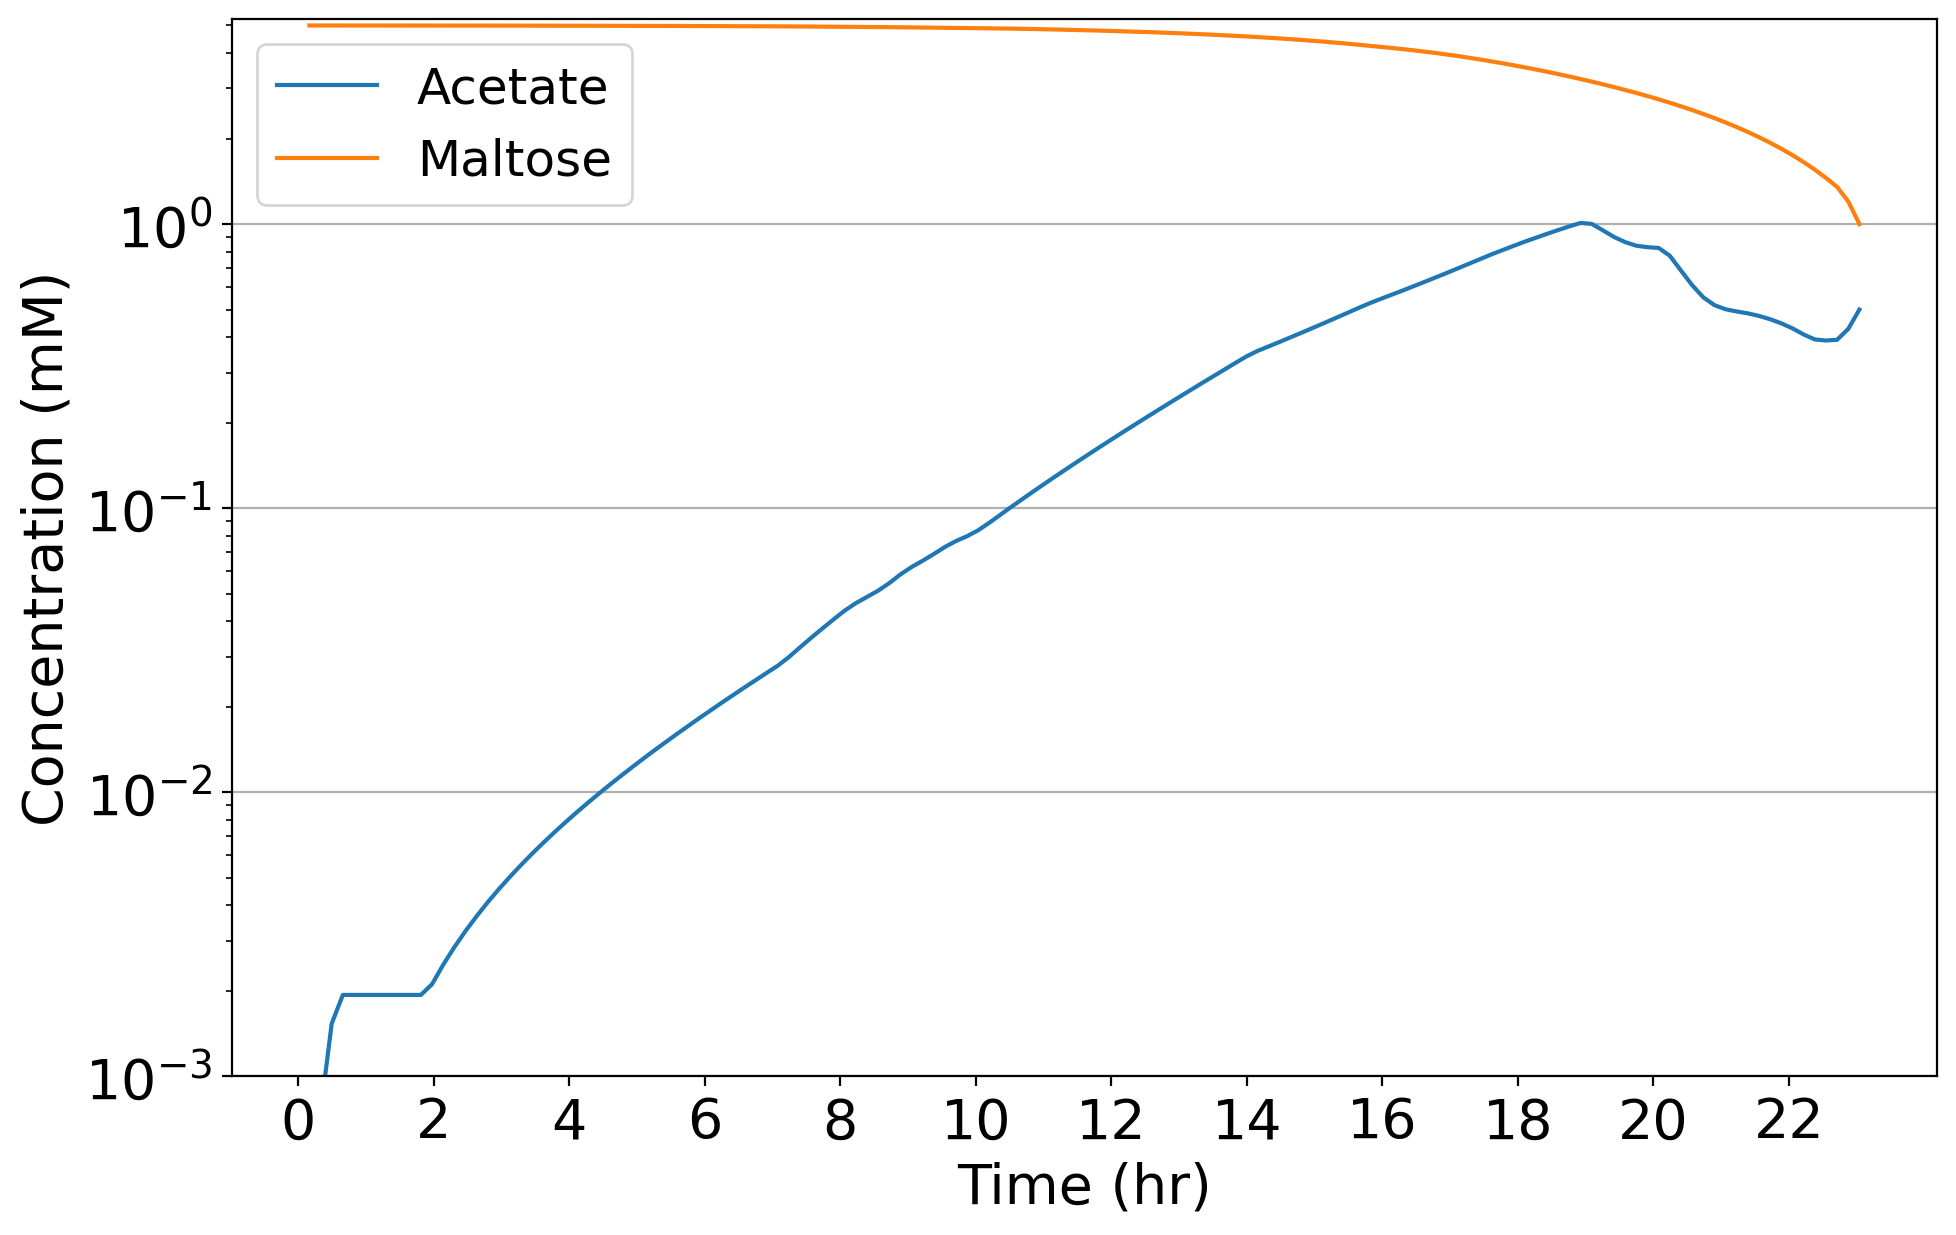

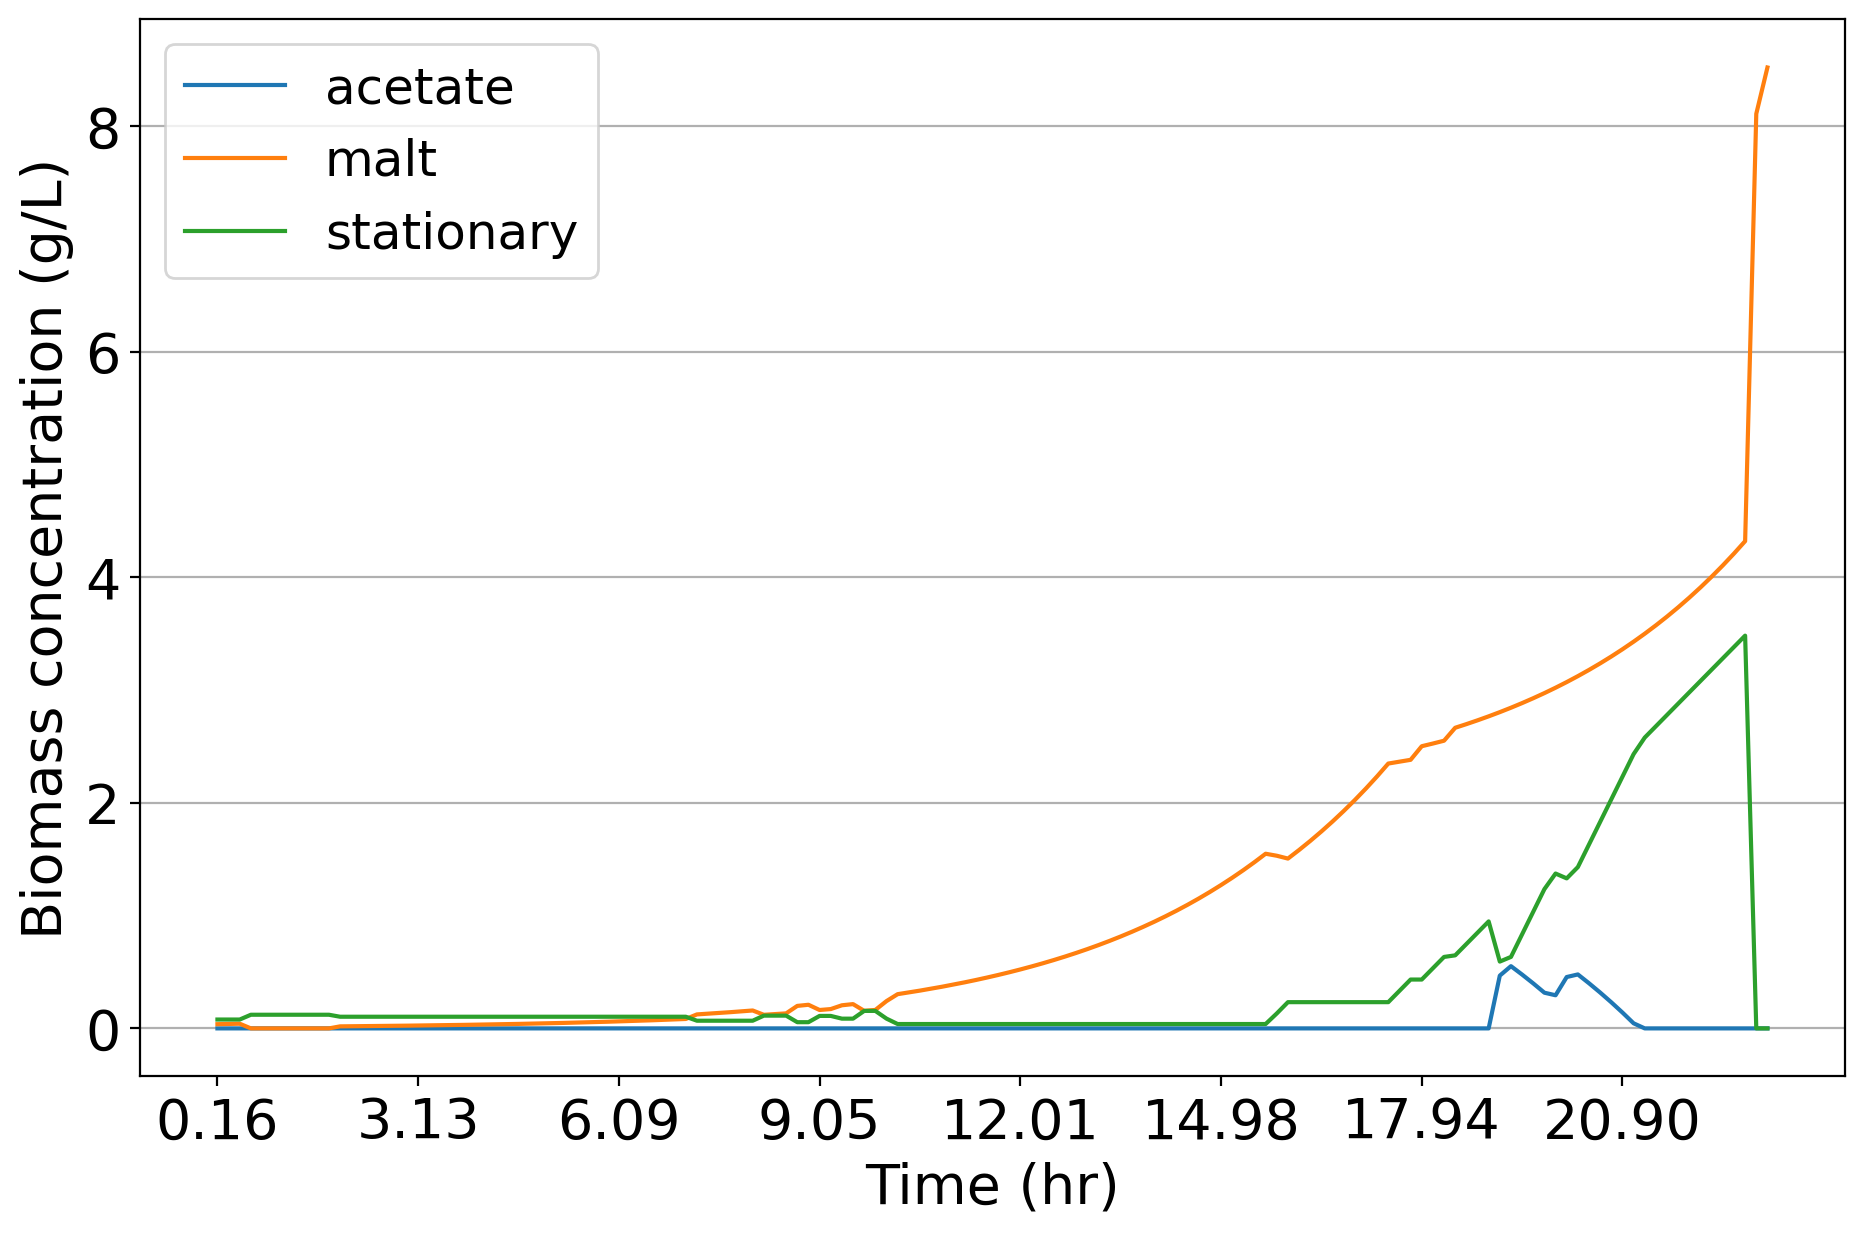

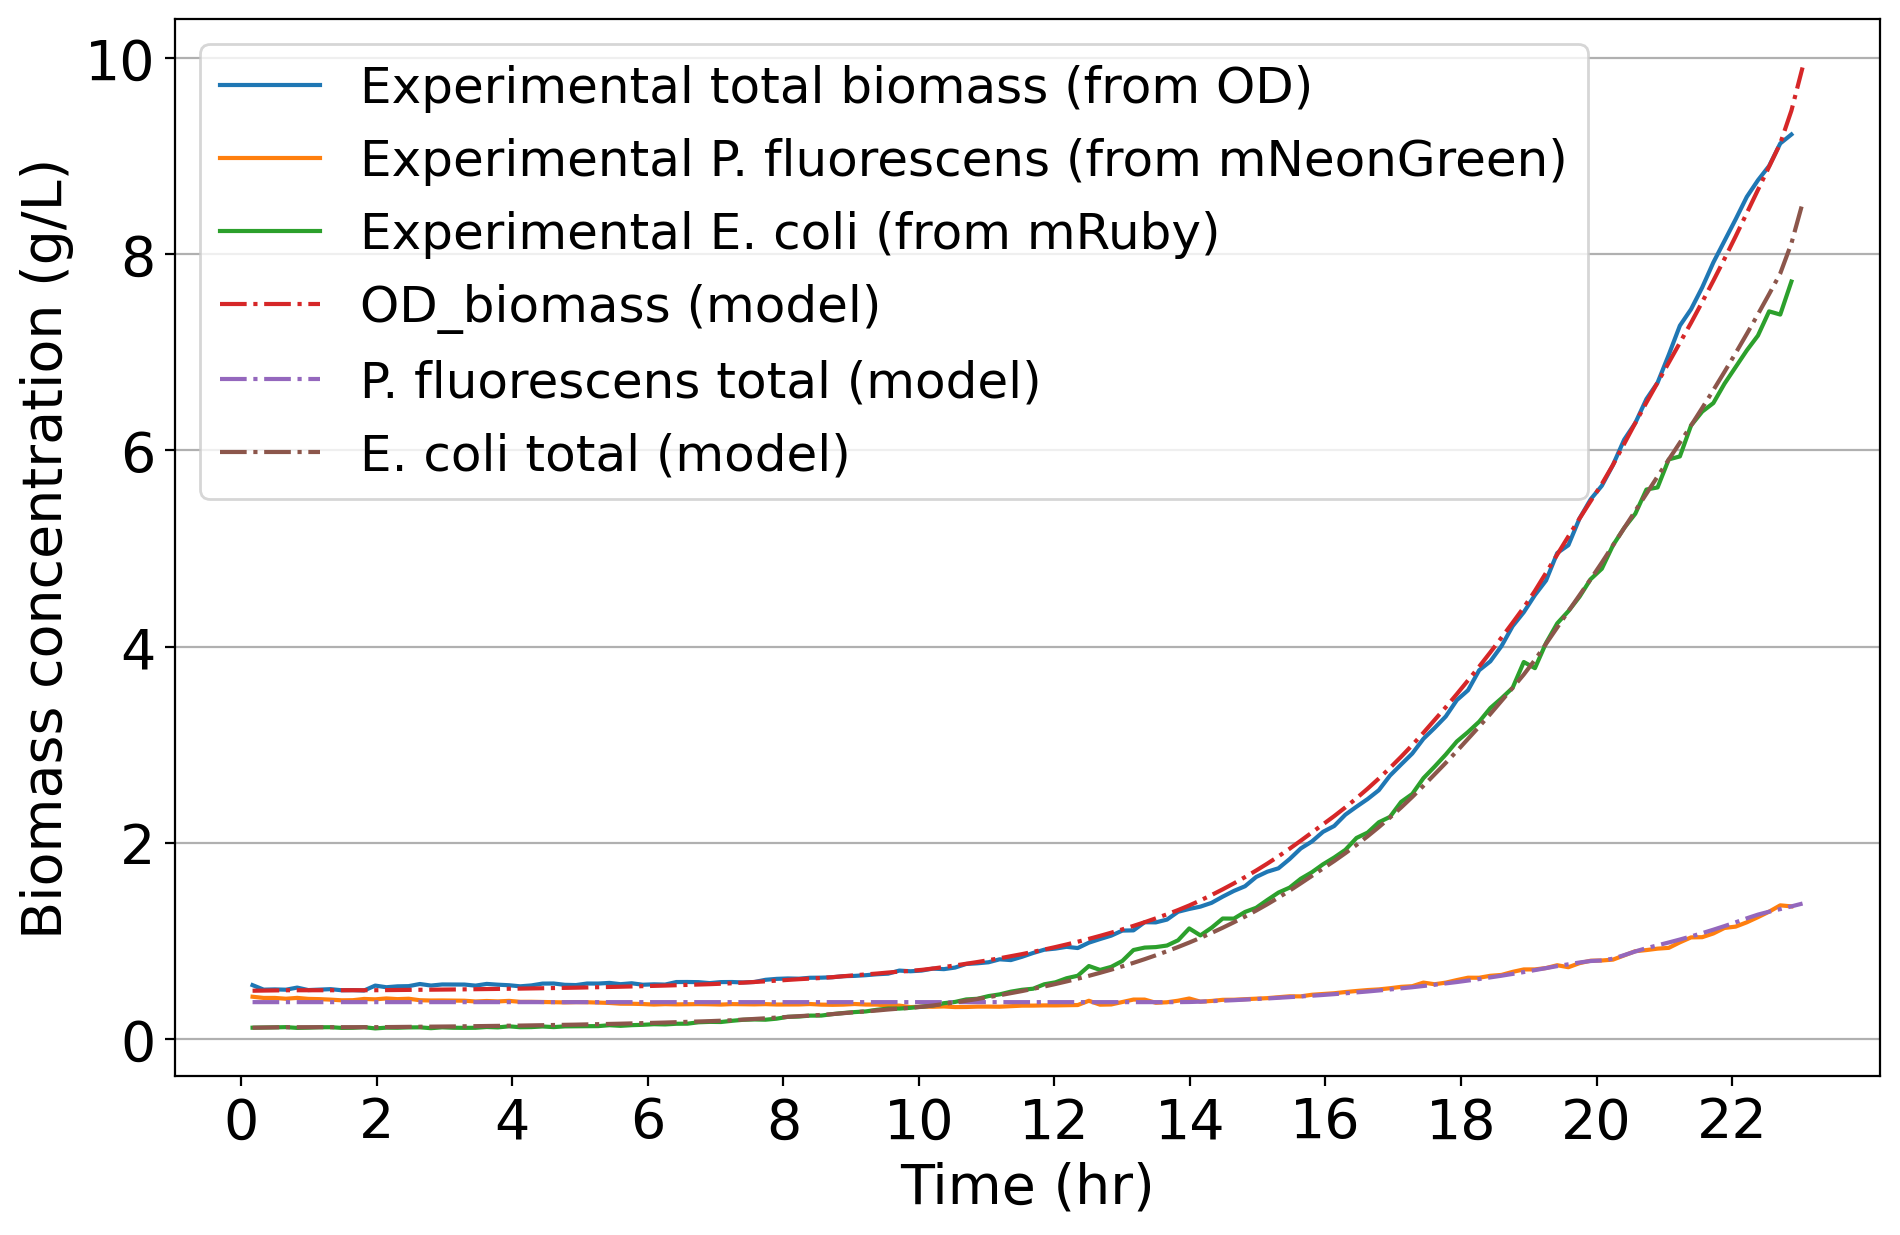

In [3]:
%run mscommfitting.py

maltose_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
maltose_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_graphs("G4", None), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

# Maltose & 4-hydroxybenzoate, trial F5

In [2]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/40/1"),
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {'acetate': ["cpd00029"], #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': ["cpd00179"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            },
        pf: {
            'name': 'pf',
            'phenotypes': {'acetate': ["cpd00029"], # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': ["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,2,3,4,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:109: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


-3.0698514492030666
-0.48914864782284867
-3.0636144602420945
The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
-1.347830069517247
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.29390945 1.29168894 1.29108779 1.28948634 1.28672094 1.28586984
 1.28528969 1.28971436

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:78: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
ic| mscommfitting.py:205 in define_problem()
    self.mets_to_track: ['cpd00179', 'cpd00029', 'cpd00136']


Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.0033854166666666668 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.10494791666666667 min
Done exporting the content: 0.021875 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'stationary', '4HB', 'malt'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G48'}


ic| mscommfitting.py:834 in graph()
    self.mets_to_track: ['cpd00179', 'cpd00029', 'cpd00136']


graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029', 'cpd00136'],
 'trial': 'G48'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'stationary', 'malt'},
 'species': ['ecoli'],
 'trial': 'G48'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G48'}


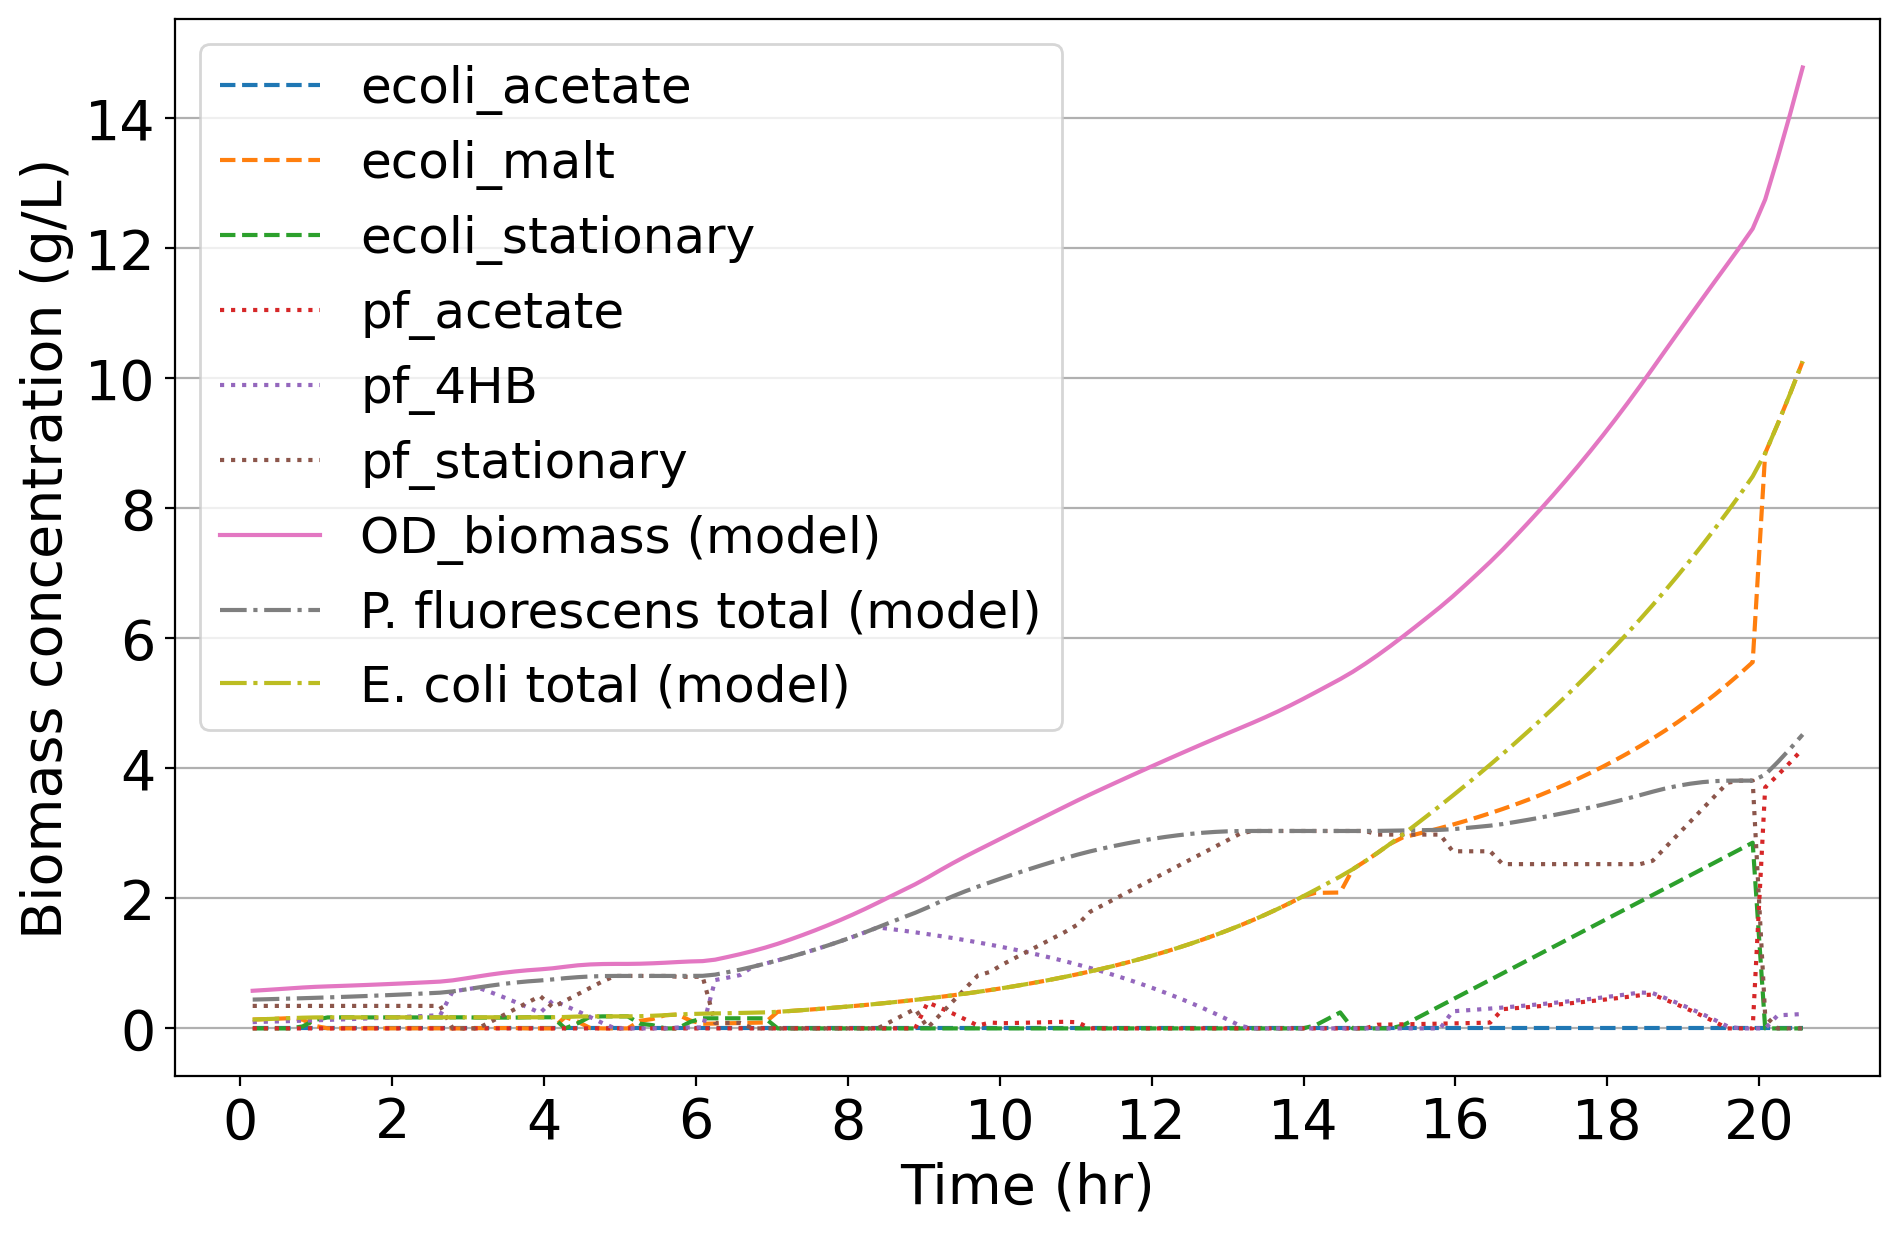

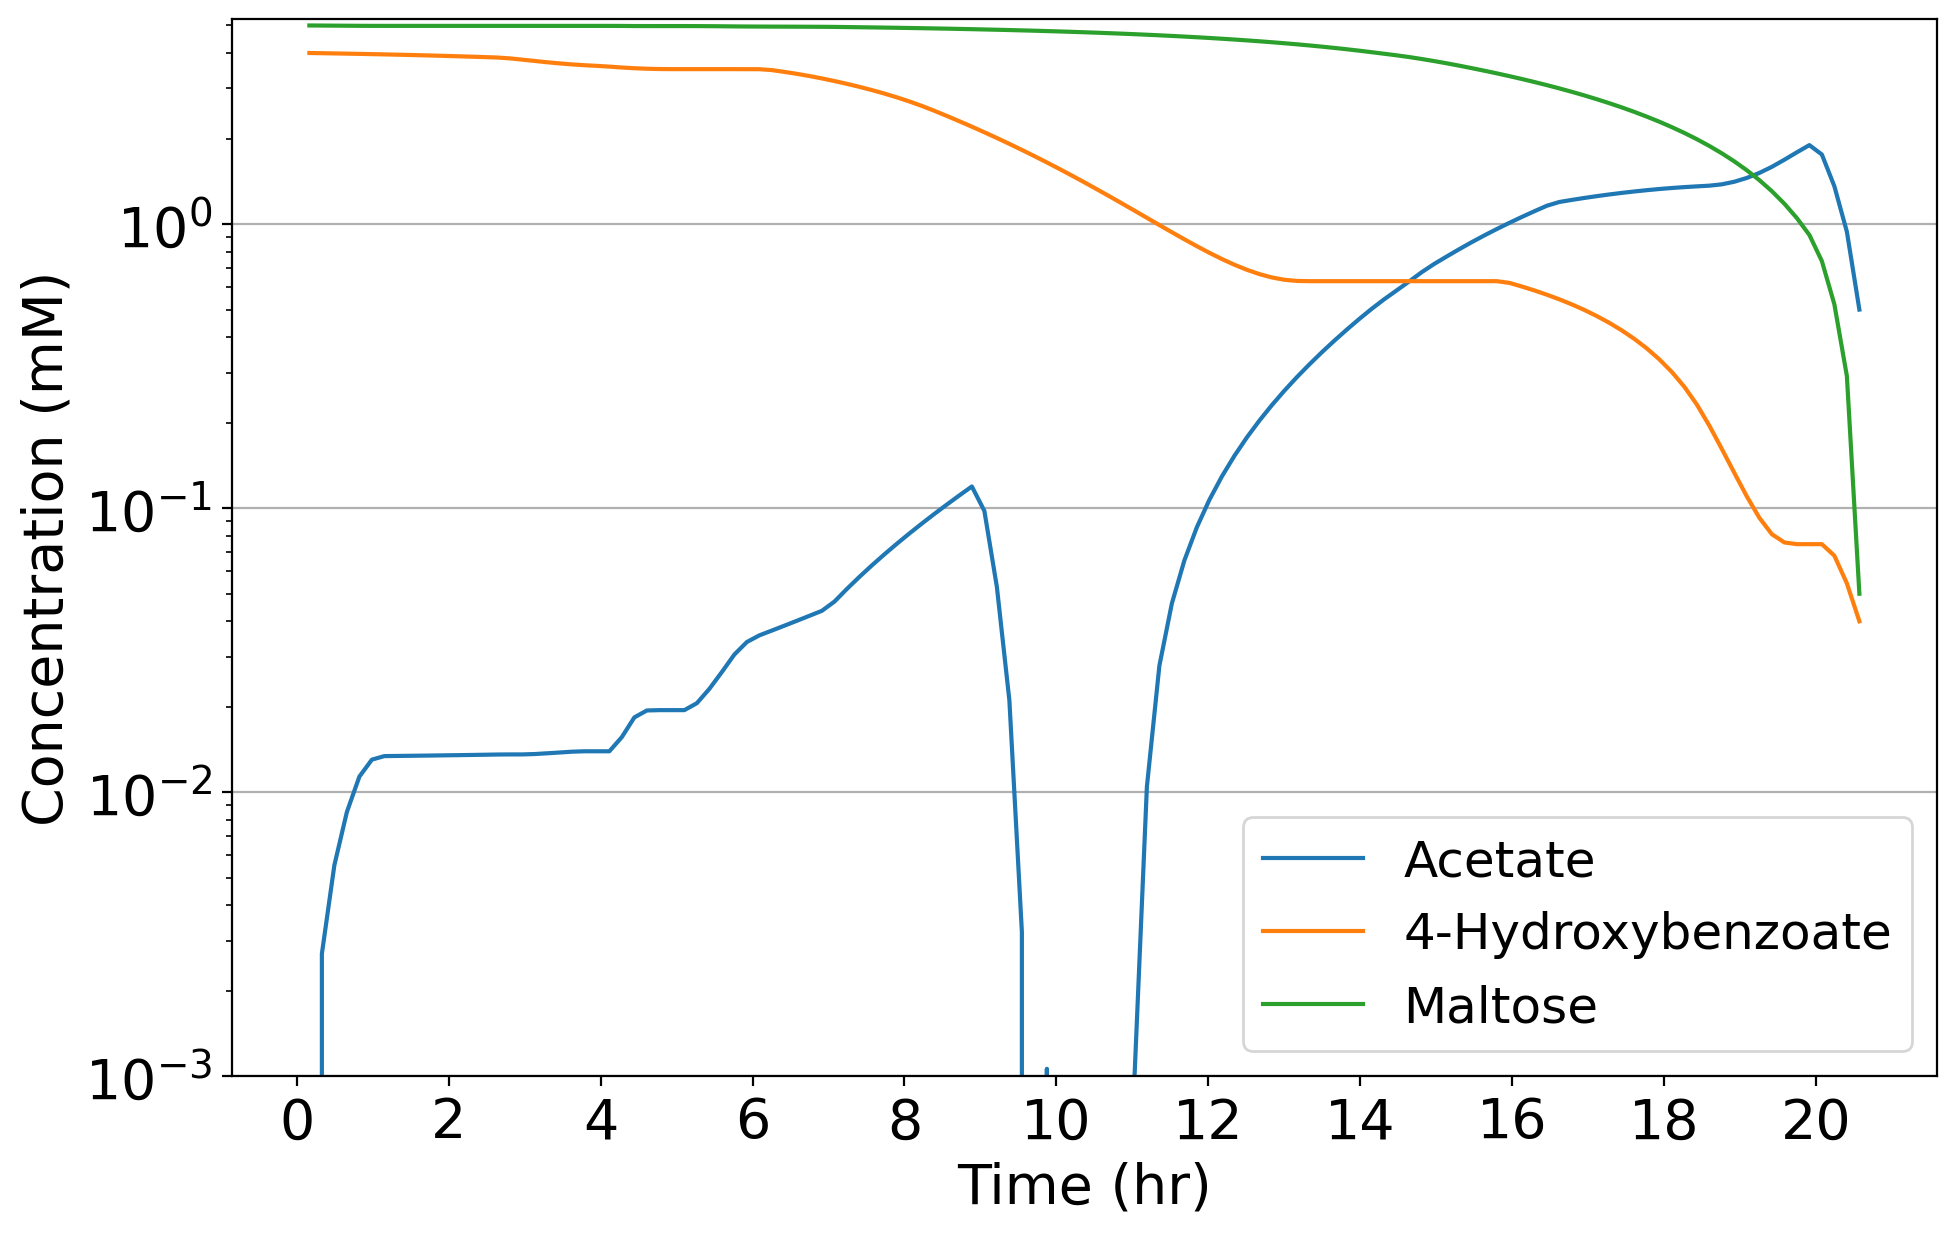

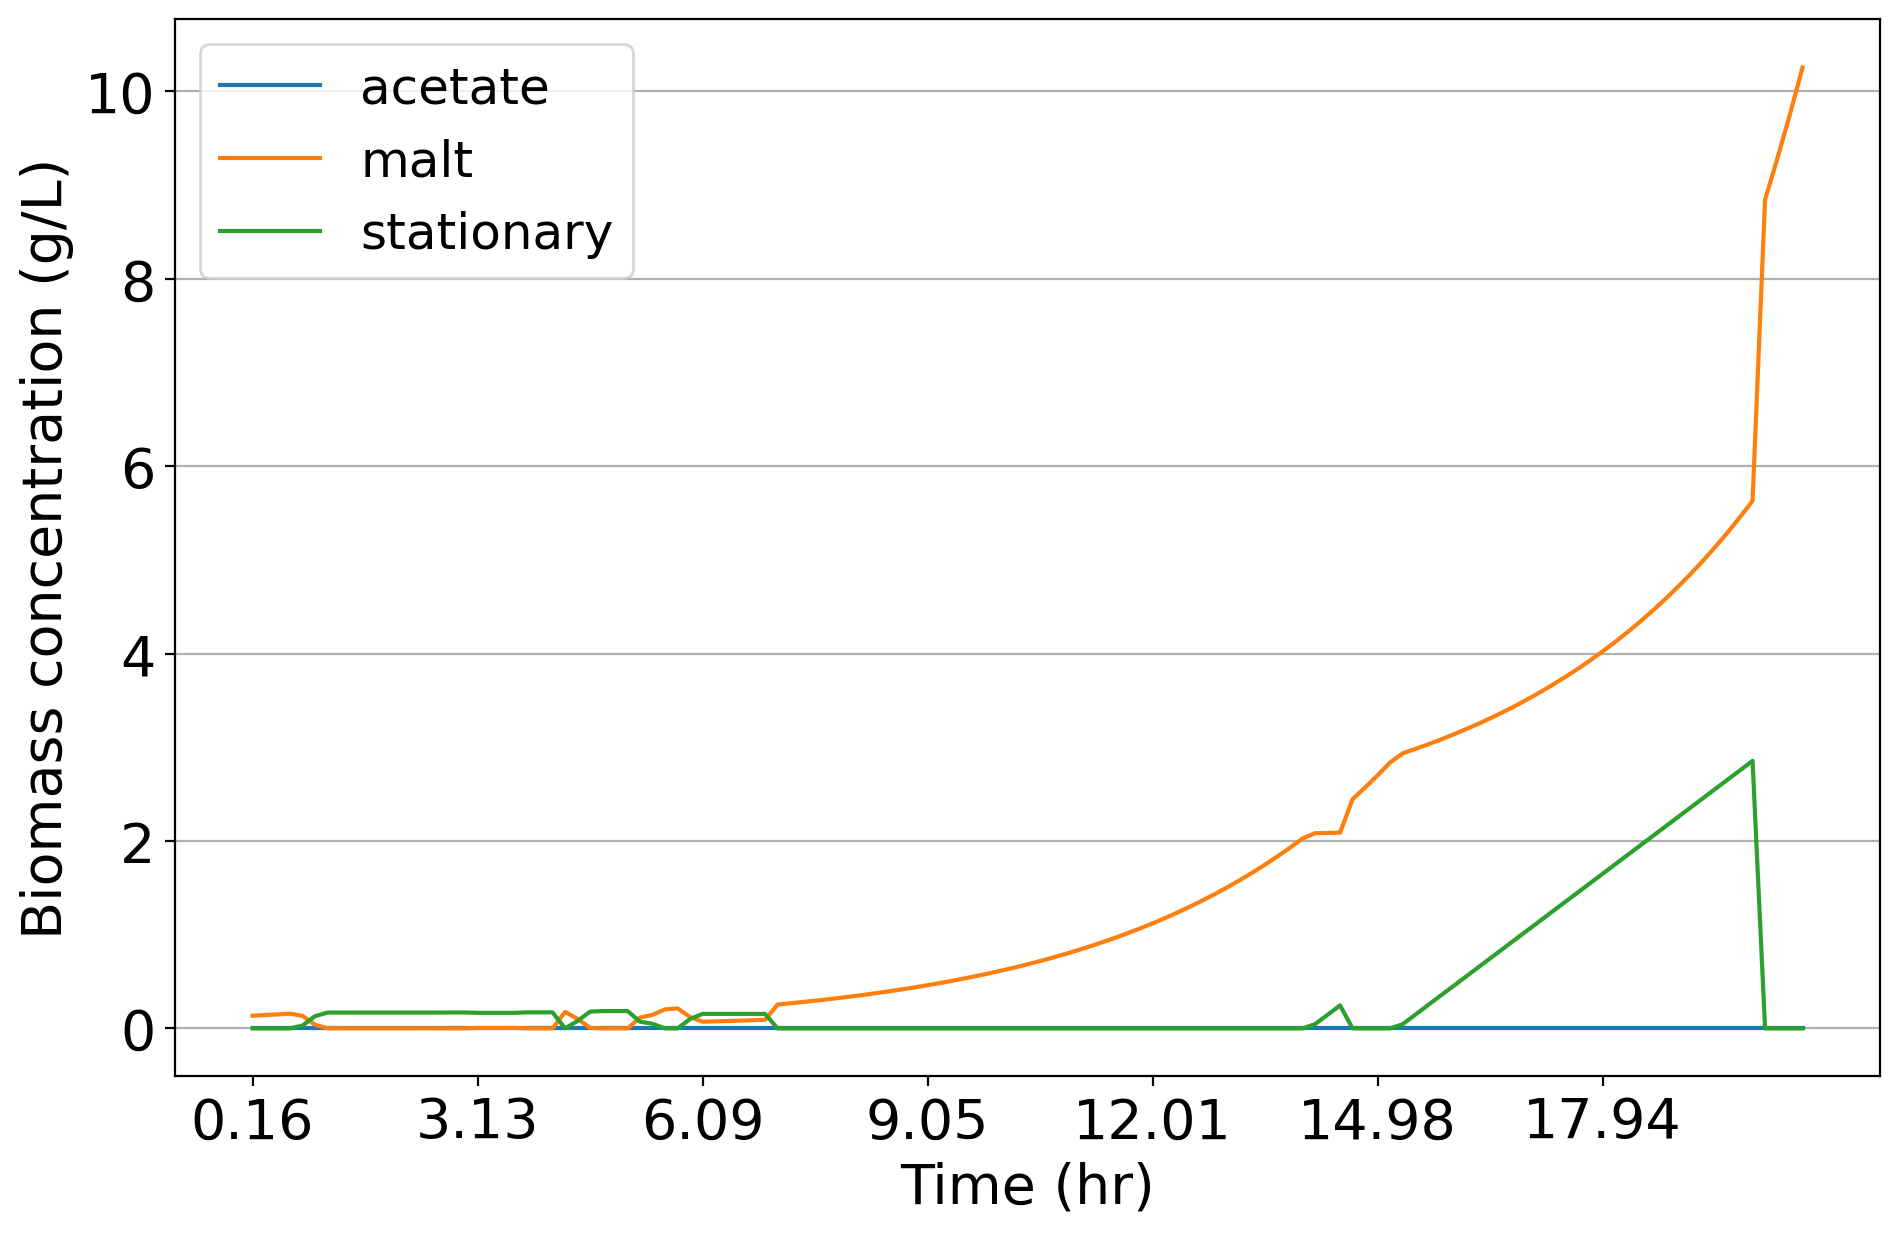

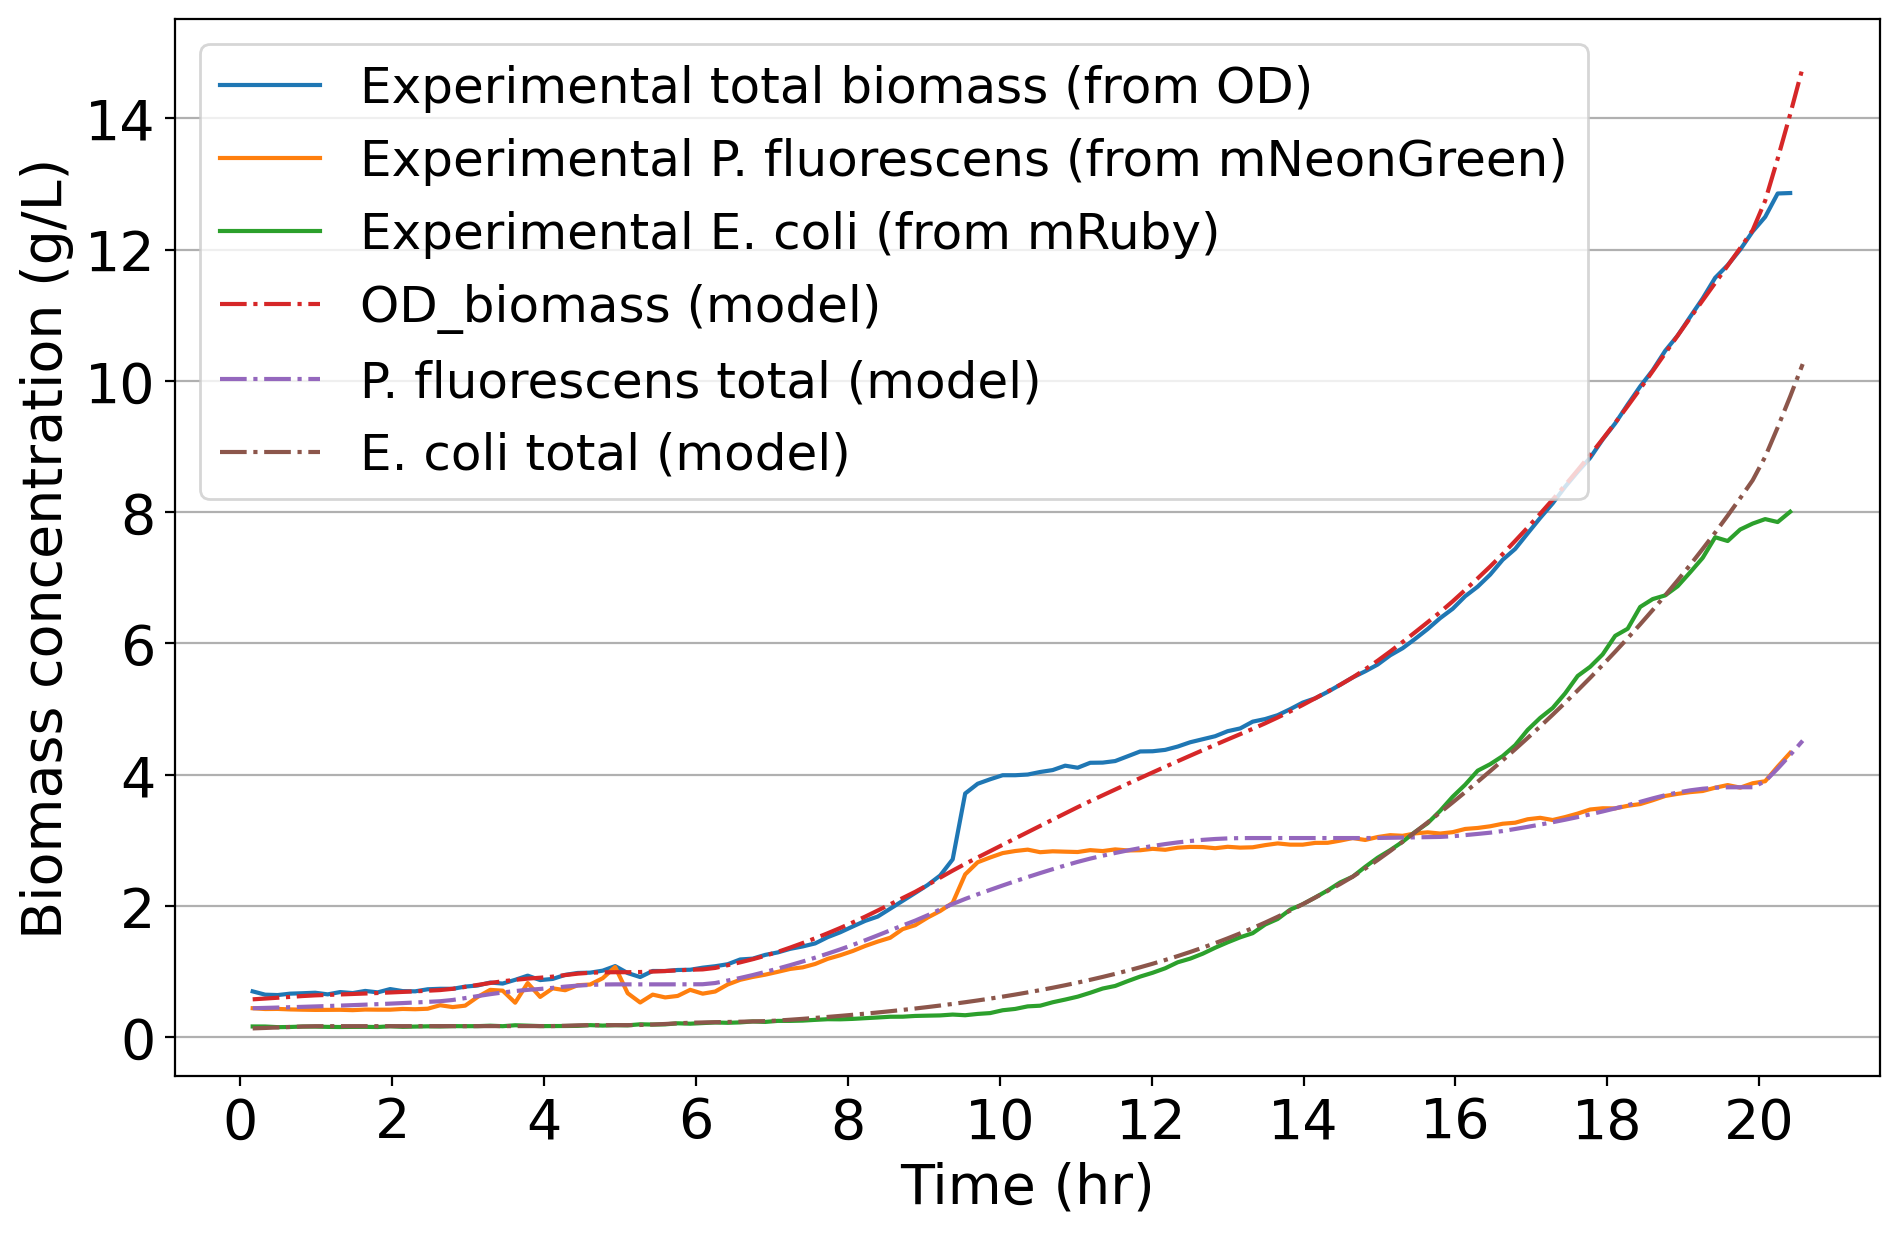

In [3]:
%run mscommfitting.py
maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029","cpd00136"],
       graphs = update_graphs("G48", None), 
     rel_final_conc = {"cpd00179":.01, "cpd00136":0.01},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    # msdb_path='../../../ModelSEEDDatabase',
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

# Acetate media, trial E3 

In [6]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'Fluorescence':'pf', 'Fluorescence 1':'ecoli'},
    species_abundances = {num:{"ecoli":1, "pf":1} for num in range(1,13)},
    carbon_conc_series = {'columns': {
        'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3},
    }},
    ignore_trials = {'rows': ['C', 'D', 'B', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    },
    significant_deviation=None
)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:109: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


-2.1674211750000065
-0.36123686250000087
-7.5588128999999755
-2.1596608285714374
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159] timesteps (with [0.55664943 0.5585803  0.54911776 0.54616618 0.54806124 0.54696361
 0.54835377 0.54954046 0.5475263  0.55053545 0.5512014  0.55228987
 0.55174298 0.55240707 0

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:78: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06901041666666667 min
Done exporting the content: 0.0125 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'stationary', '4HB', 'acetate', 'malt'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G38'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'trial': 'G38'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'stationary', 'acetate', 'malt'},
 'species': ['ecoli'],
 'trial': 'G38'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G38'}


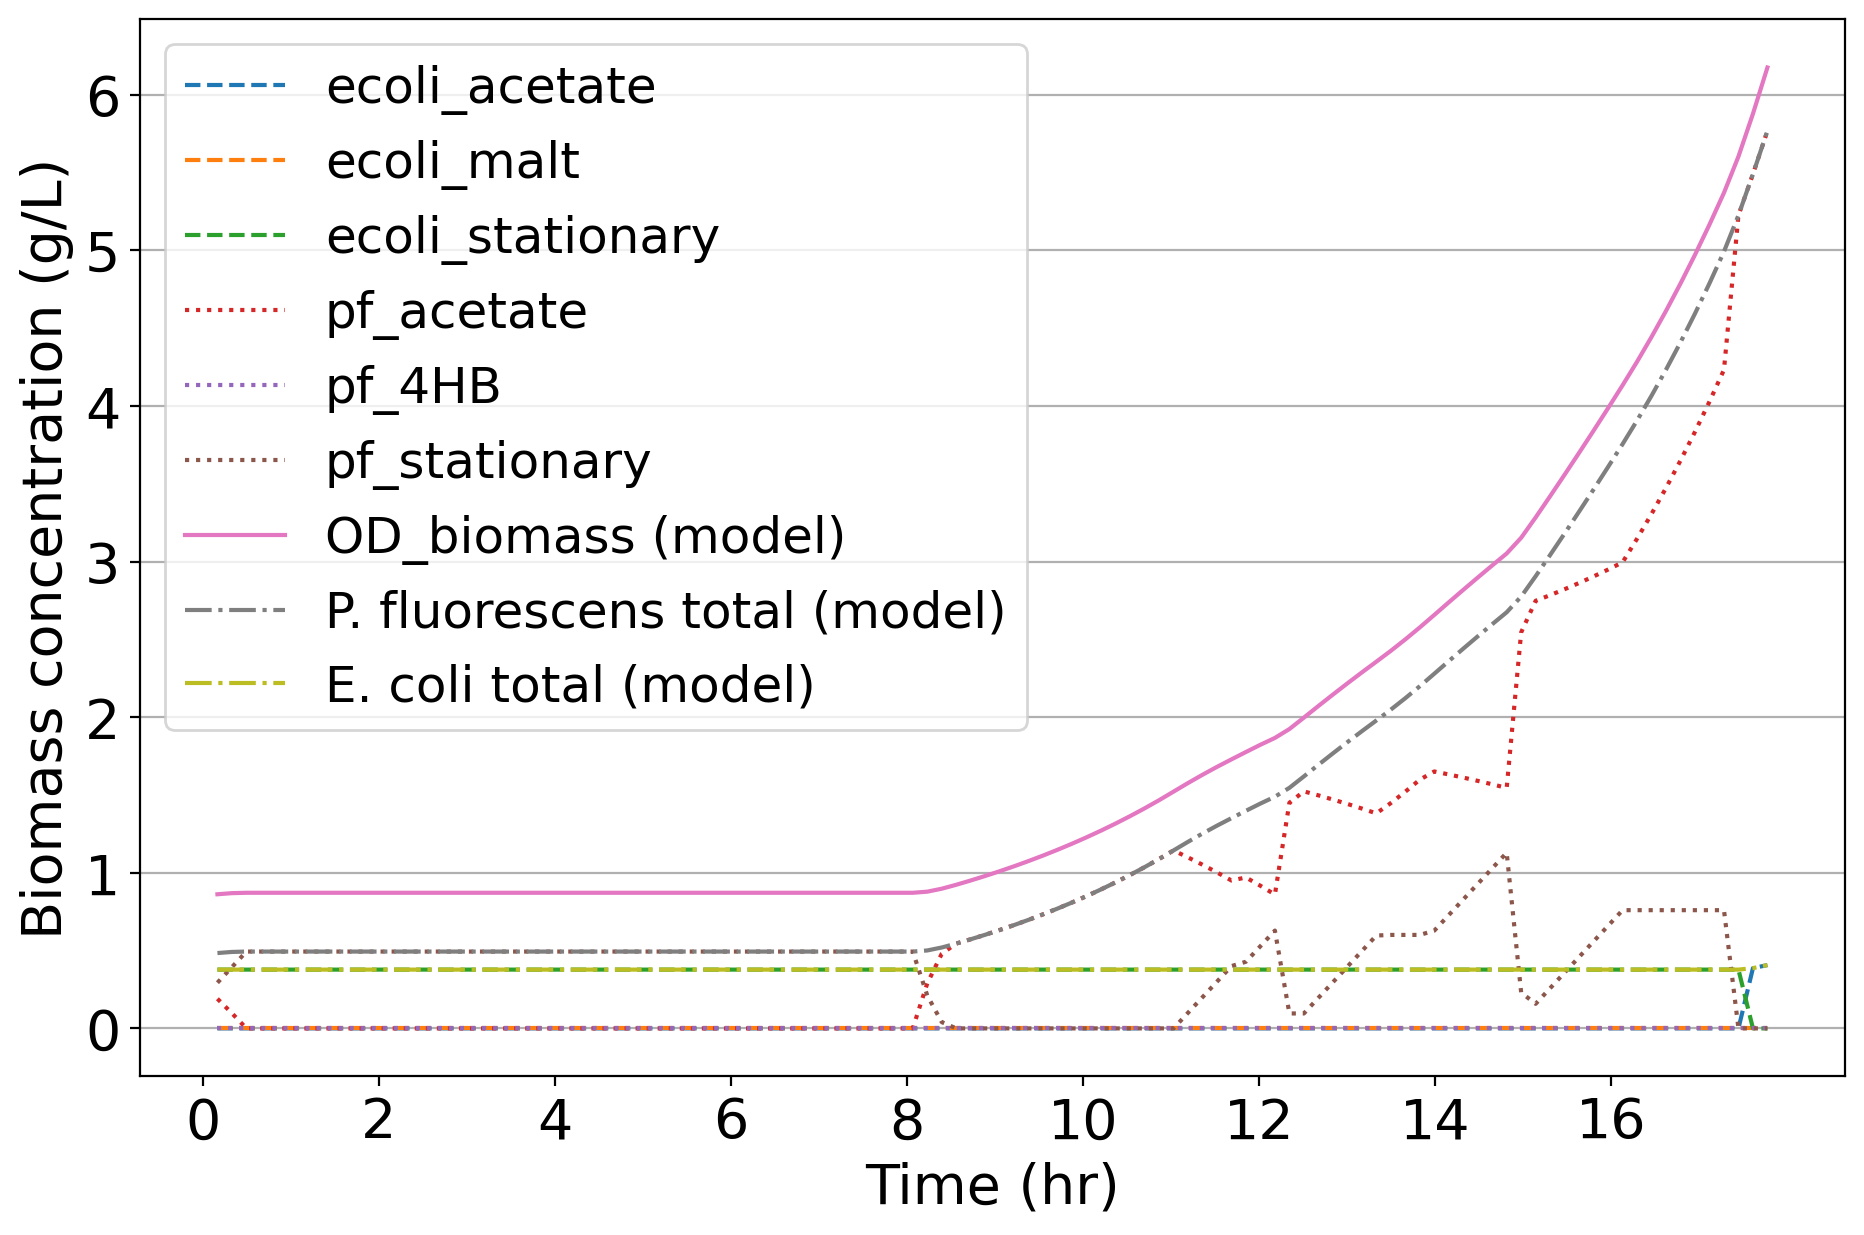

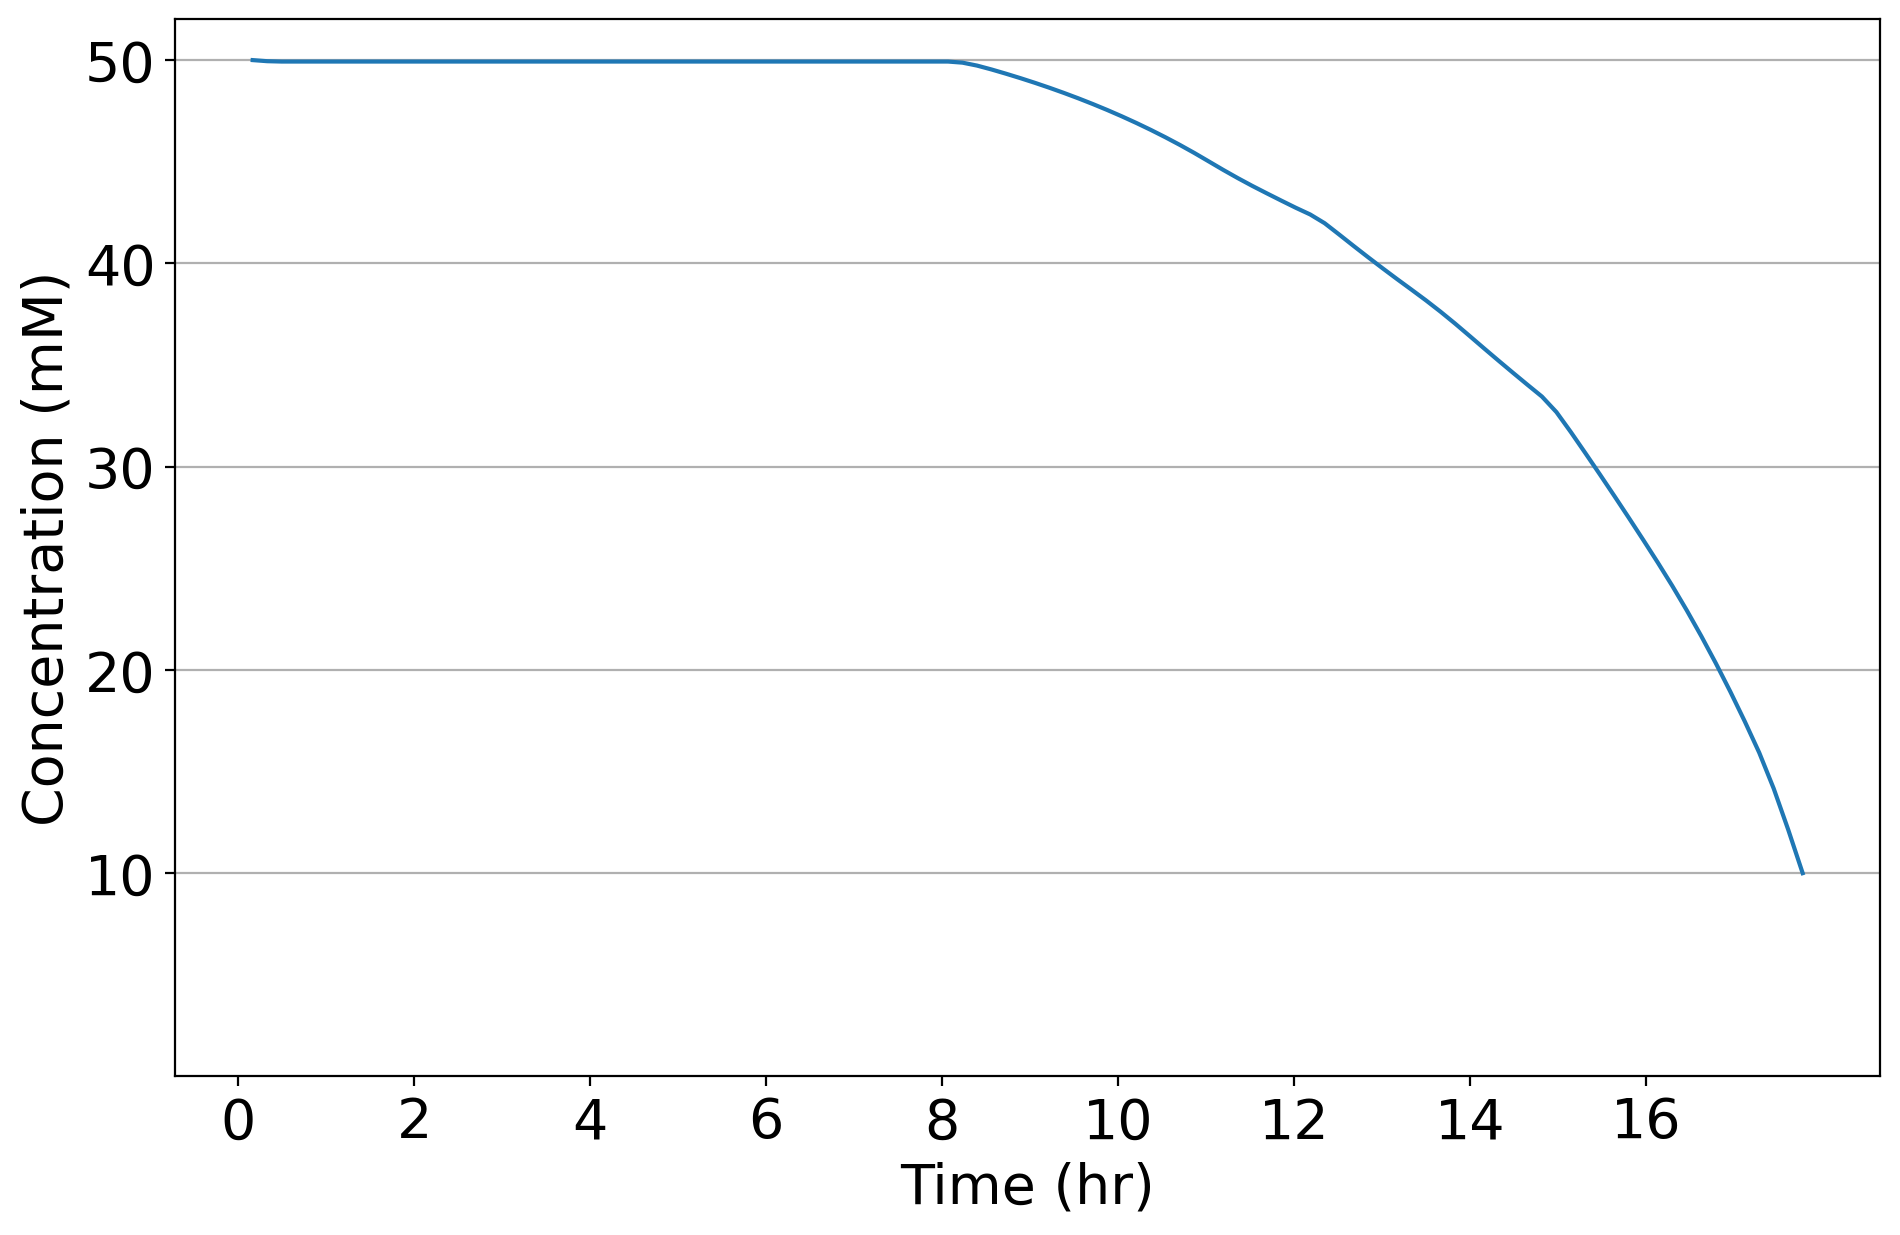

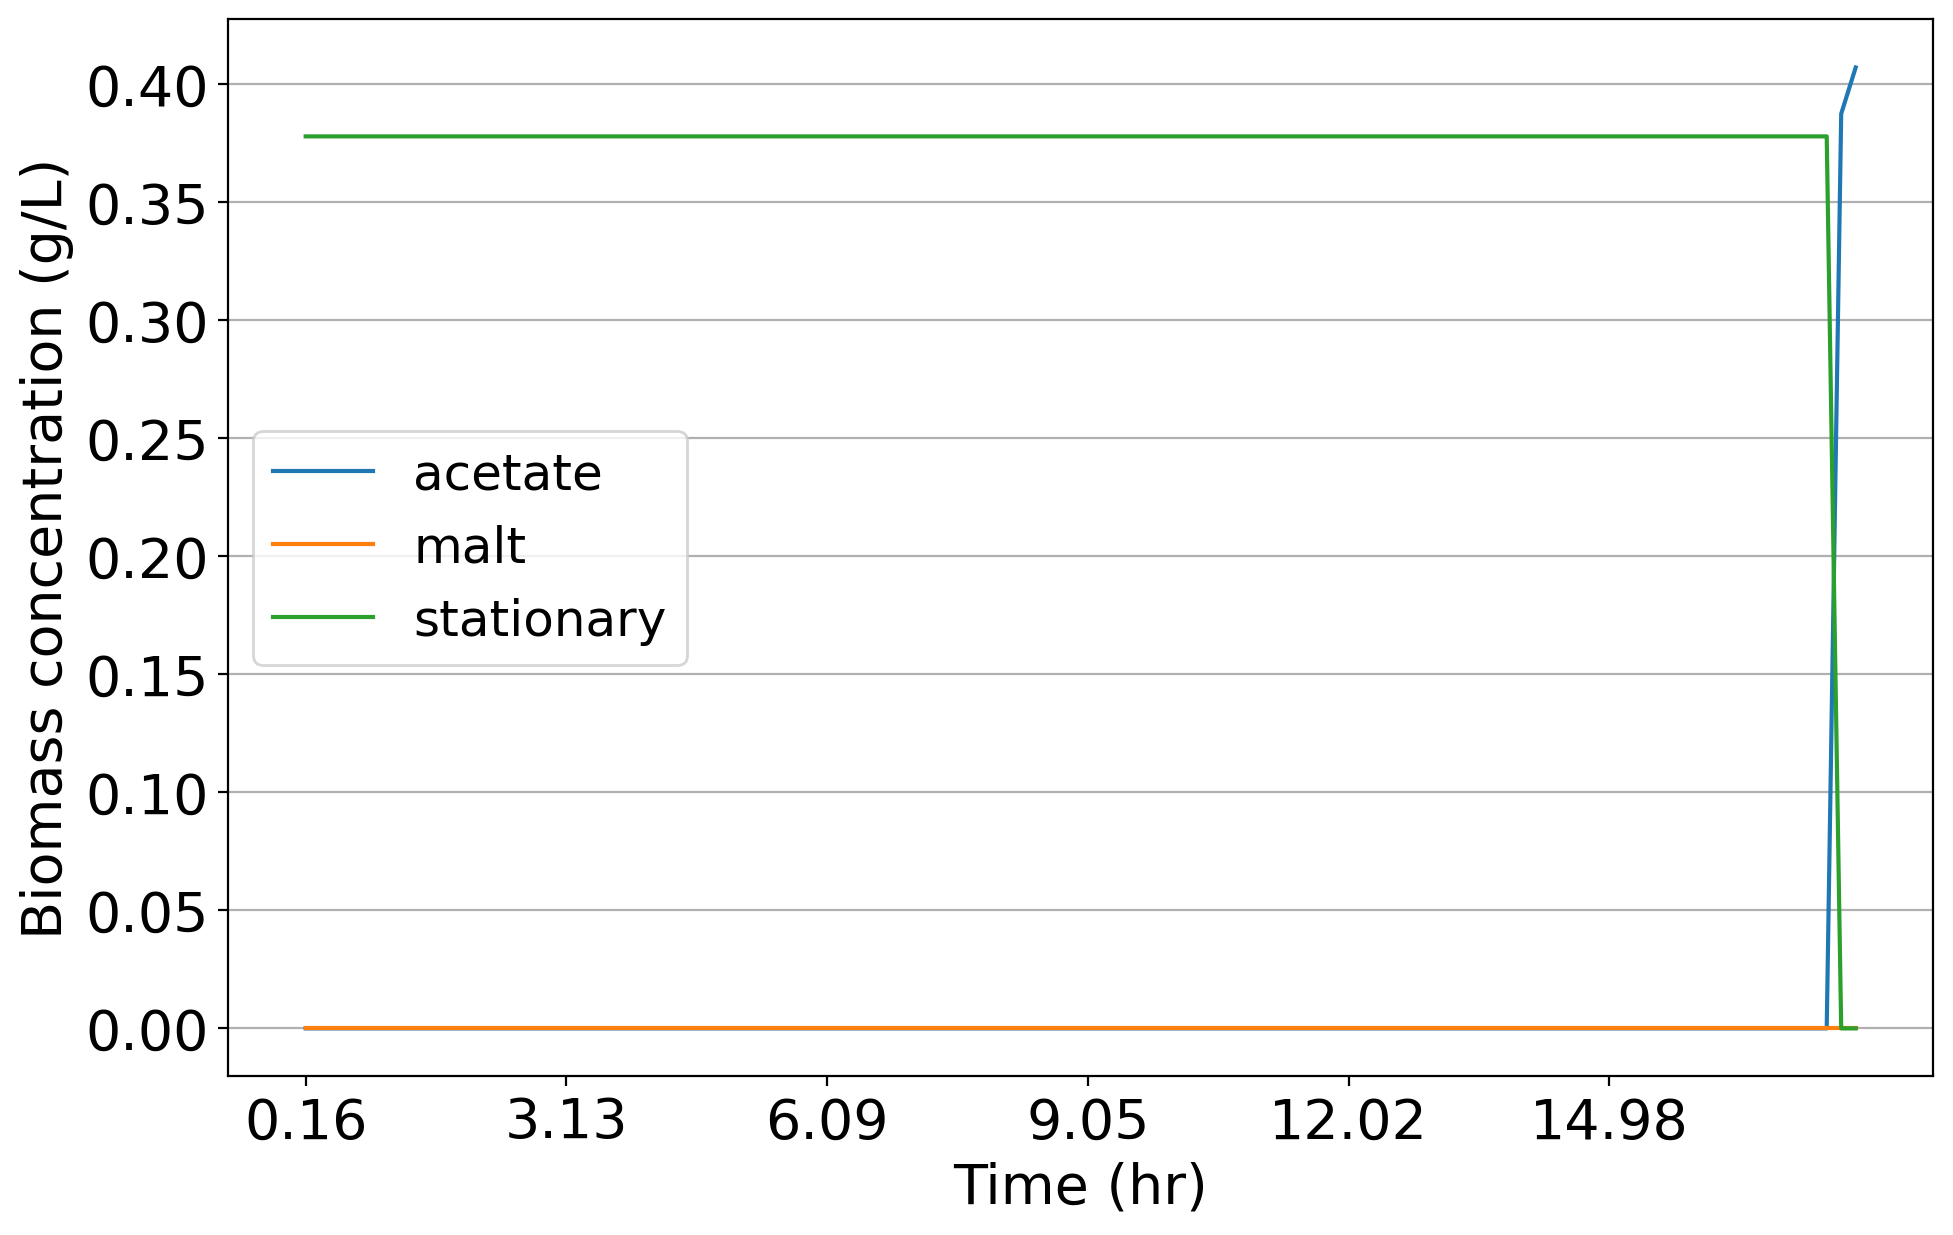

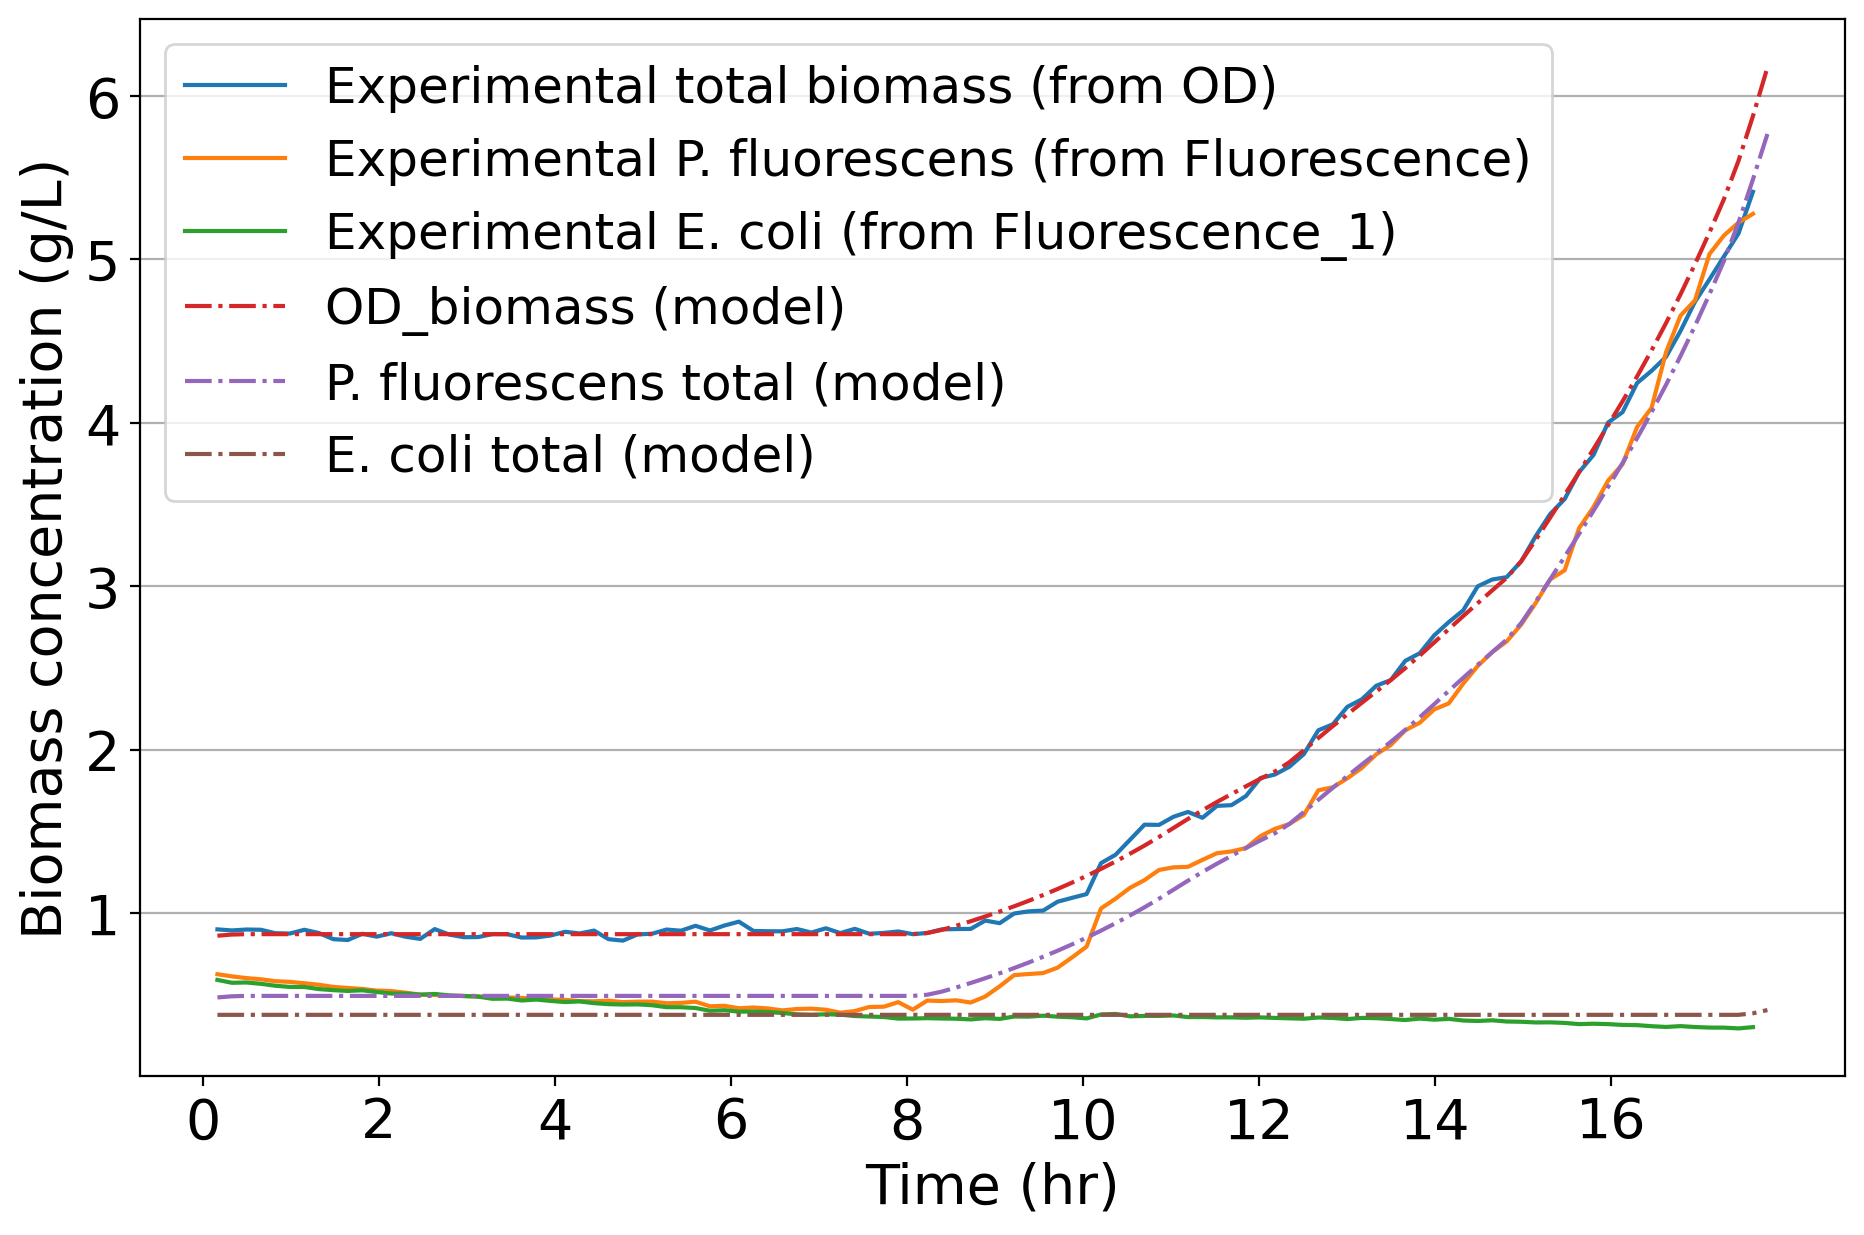

In [7]:
%run mscommfitting.py

acetate_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
acetate_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,  # cvmin < bcv should be implemented  # cvmin should be informed by the biomass results, growth can never be zero
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00029"],
       graphs = update_graphs("G38", None), 
     rel_final_conc = {"cpd00029":0.2},
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)